In [133]:
import numpy as np
import pandas as pd


data = pd.read_csv("data.csv", parse_dates=["date"], index_col="date")
x = pd.DataFrame(data)
x.head(10)

,signal,spy_close_price
date,,
2012-01-03,3.107767,127.495
2012-01-04,3.107282,127.700
2012-01-05,3.099757,128.040
2012-01-06,3.134223,127.710
2012-01-09,3.135922,128.020
2012-01-10,3.143447,129.130
2012-01-11,3.127184,129.200
2012-01-12,3.139320,129.510
2012-01-13,3.174029,128.840


## CLEAN UP THE DATA

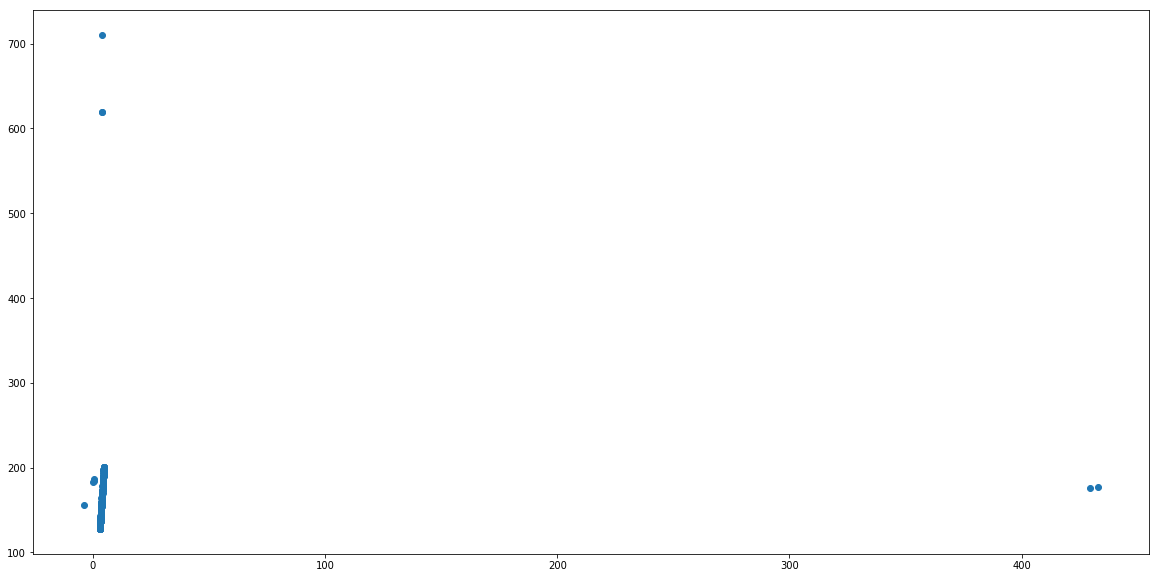

In [134]:
#claim: there's a correlation btw signal and close_price

#first step is to clean the data
import matplotlib.pyplot as plt

plt.scatter(x['signal'], x['spy_close_price'])
plt.show()

In [135]:
df = x
df = df[df.loc[:,'spy_close_price'] < 300]
df = df[df.loc[:,'spy_close_price'] > 0]

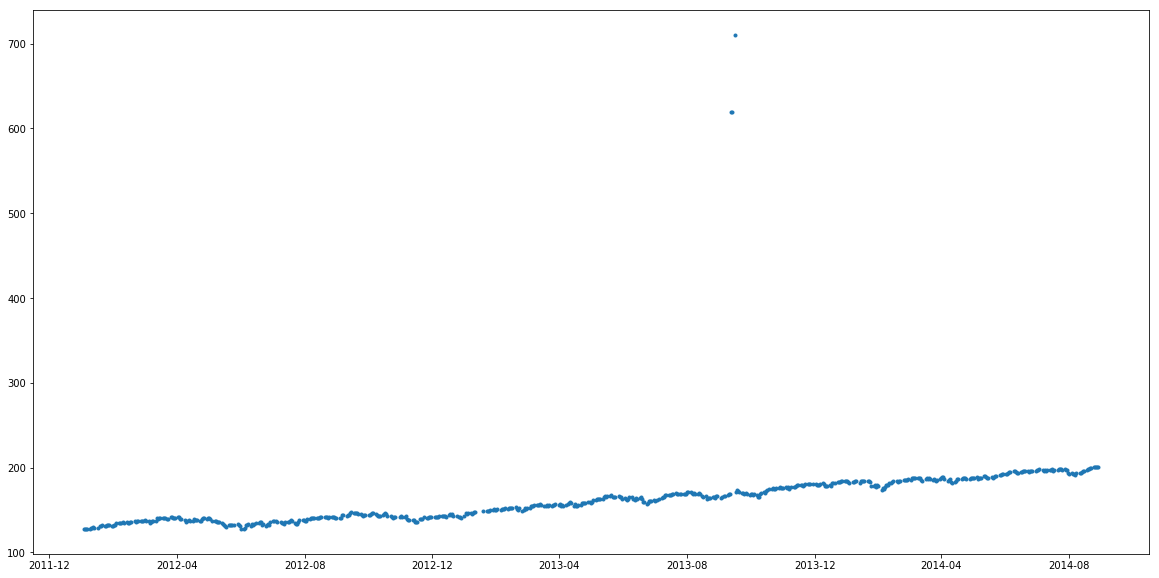

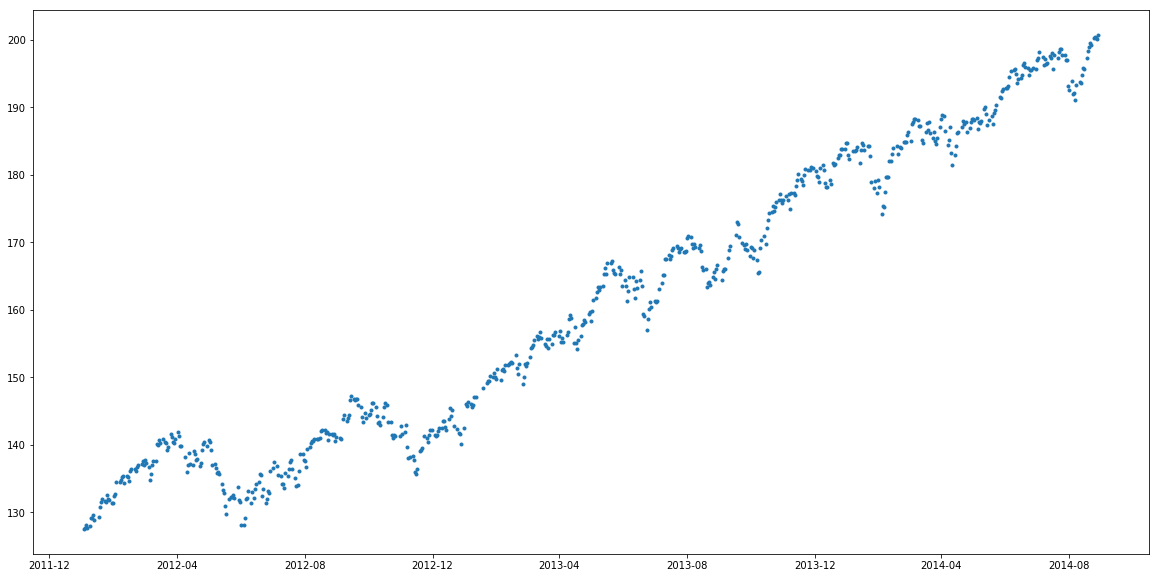

In [136]:
plt.plot(x.index.tolist(), x['spy_close_price'], '.')
plt.show()

plt.plot(df.index.tolist(), df['spy_close_price'], '.')
plt.show()

In [137]:
ts = df.drop(columns=['signal'])
ts.head()

,spy_close_price
date,
2012-01-03,127.495
2012-01-04,127.700
2012-01-05,128.040
2012-01-06,127.710
2012-01-09,128.020


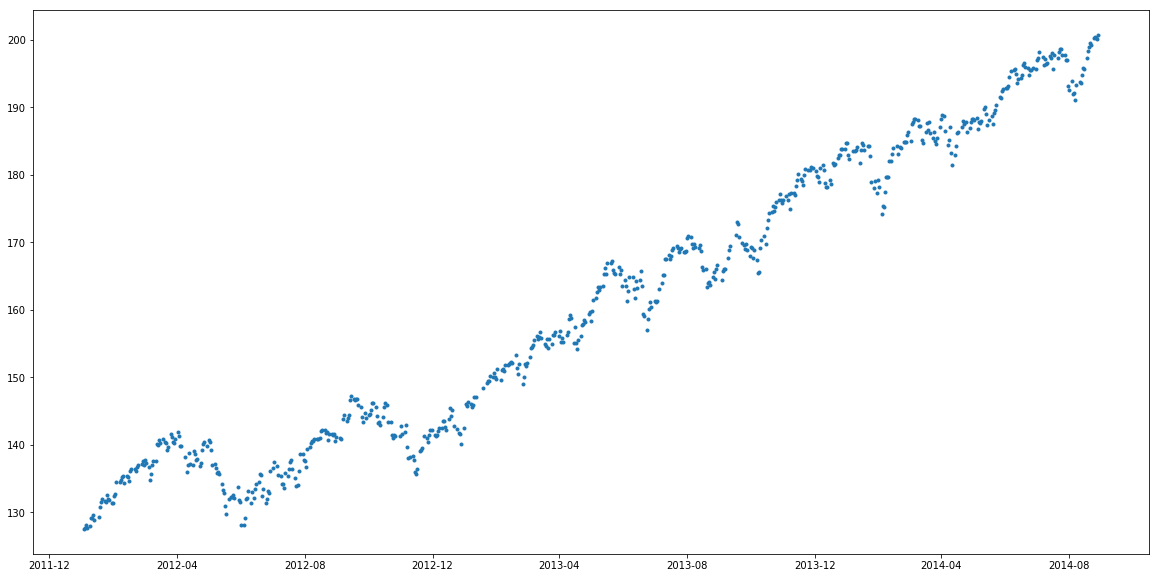

In [138]:
plt.plot(ts, '.')
plt.show()

## LETS TRY POLYNOMAIL REGRESSION

In [139]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

X = [[0.44, 0.68], [0.99, 0.23]]
vector = [109.85, 155.72]
predict= [0.49, 0.18]

poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
predict_ = poly.fit_transform(predict)

clf = linear_model.LinearRegression()
clf.fit(X_, vector)
print (clf.predict(predict_))


ValueError: Expected 2D array, got 1D array instead:
array=[ 0.49  0.18].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## SOME COMPUTATION

In [140]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

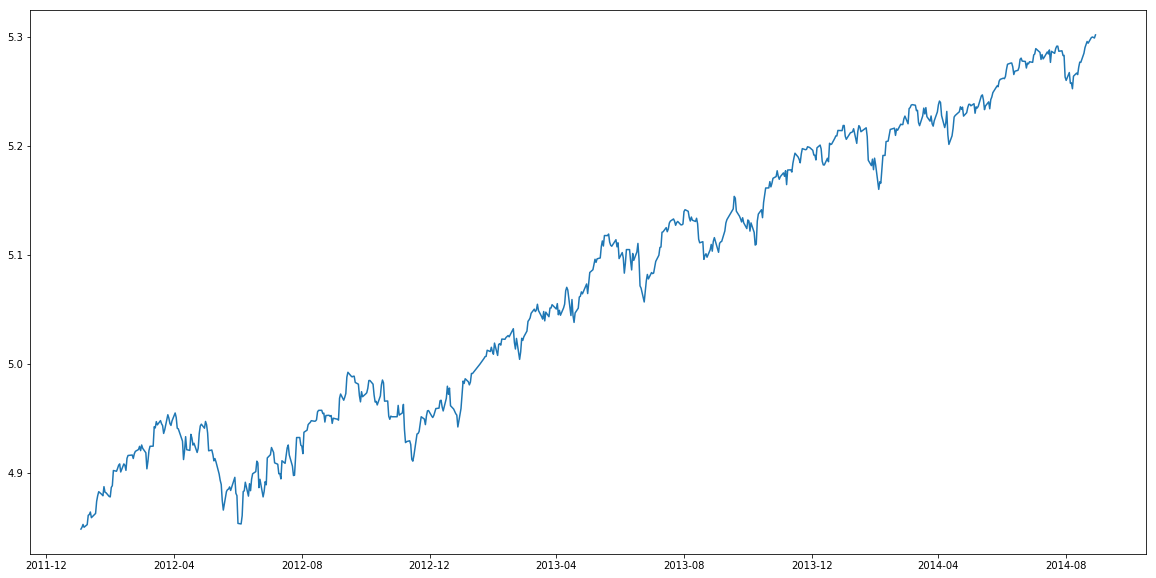

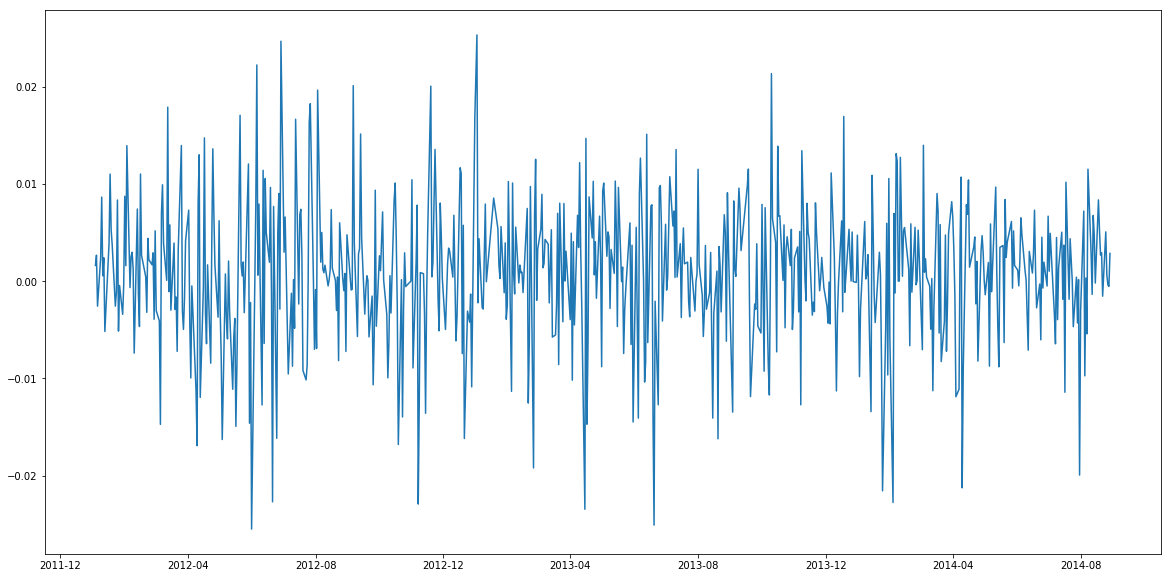

In [142]:
ts_log = np.log(ts)
plt.plot(ts_log)
plt.show()

ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.show()

/Users/arkwl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  """
/Users/arkwl/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  


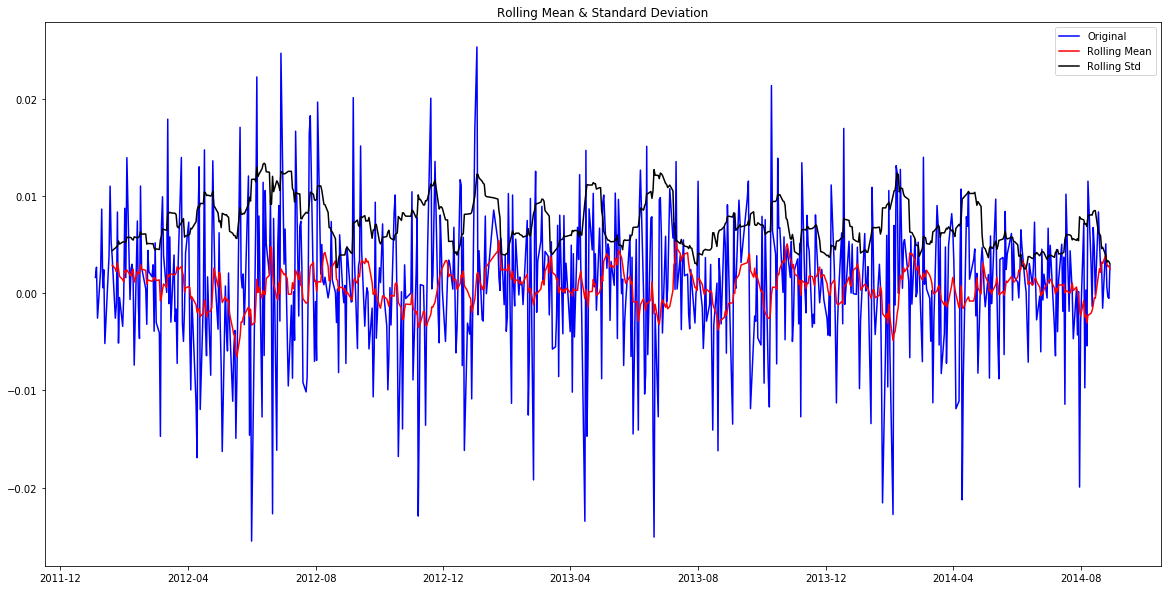

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [141]:
test_stationarity(ts_log_diff)

## FORCASTING TIME SERIES

In [143]:
from statsmodels.tsa.stattools import acf, pacf

ts_log_diff.dropna(inplace=True)

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

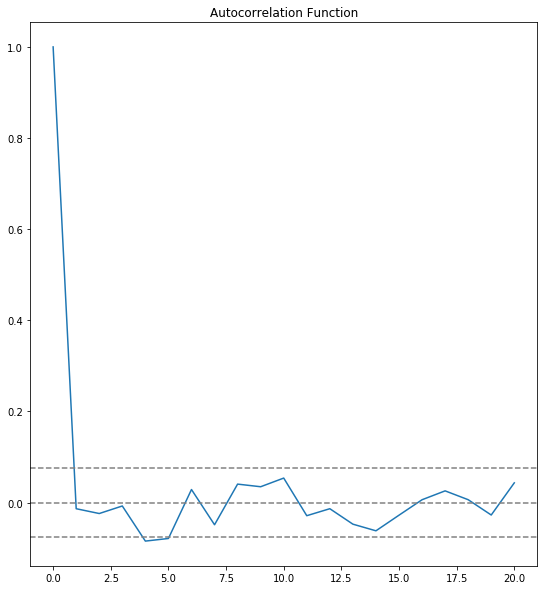

In [144]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

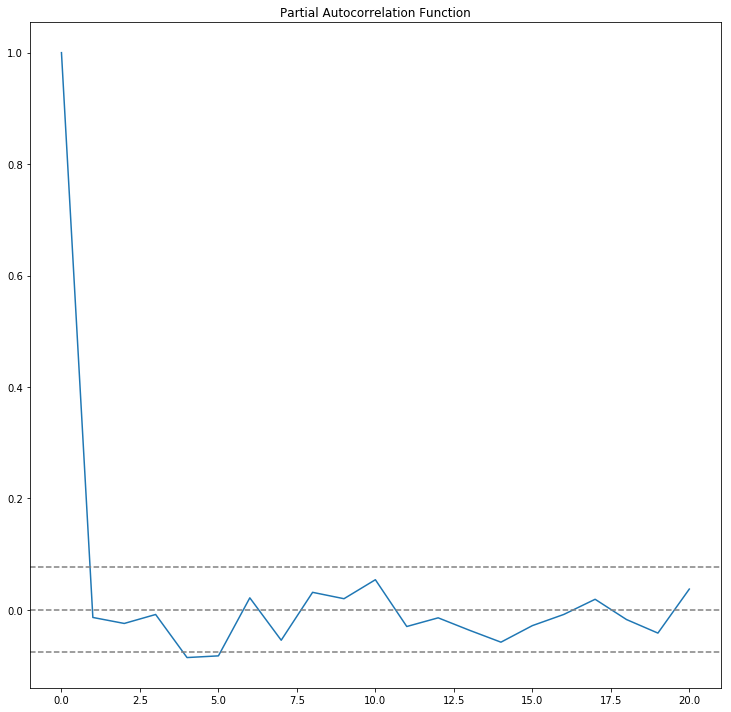

In [145]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

In [146]:
ts_log_diff.head()

,spy_close_price
date,
2012-01-04,0.001607
2012-01-05,0.002659
2012-01-06,-0.002581
2012-01-09,0.002424
2012-01-10,0.008633


In [147]:
from statsmodels.tsa.arima_model import ARIMA

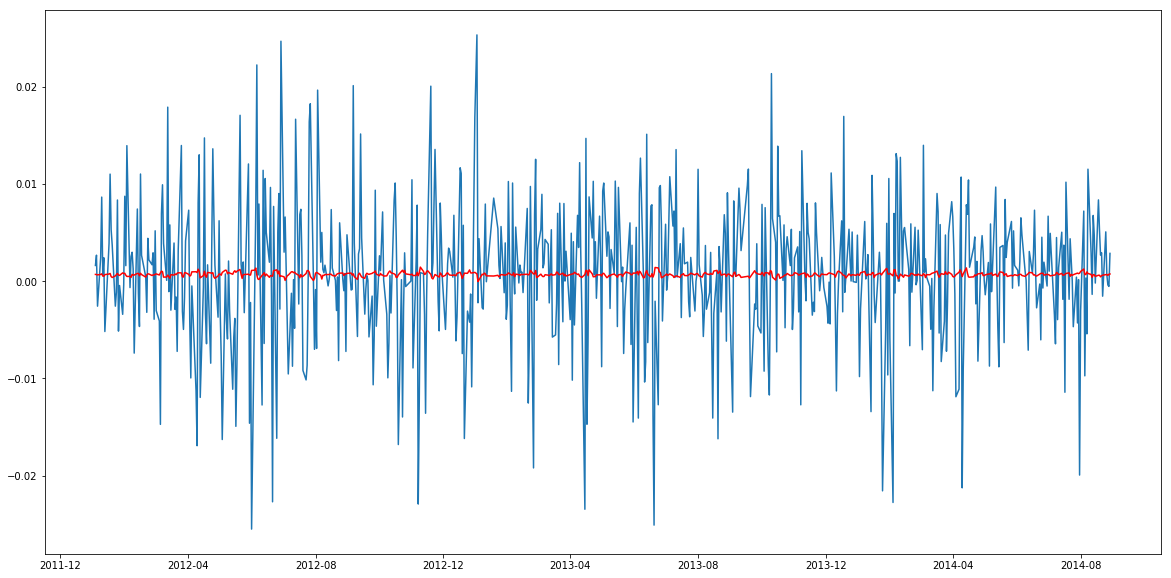

In [148]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.show()

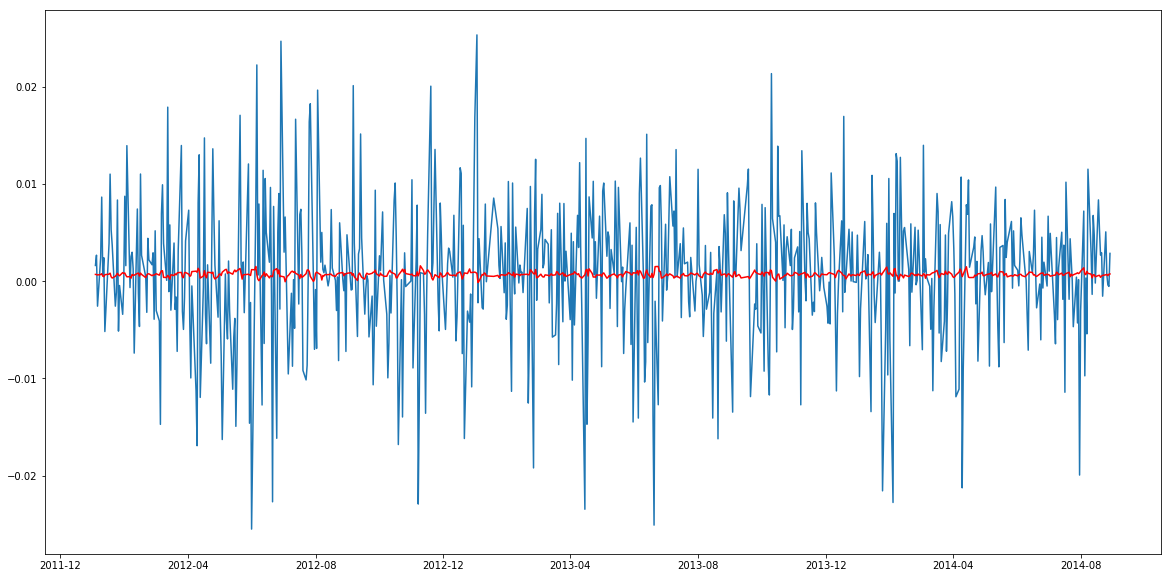

In [149]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.show()

/Users/arkwl/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


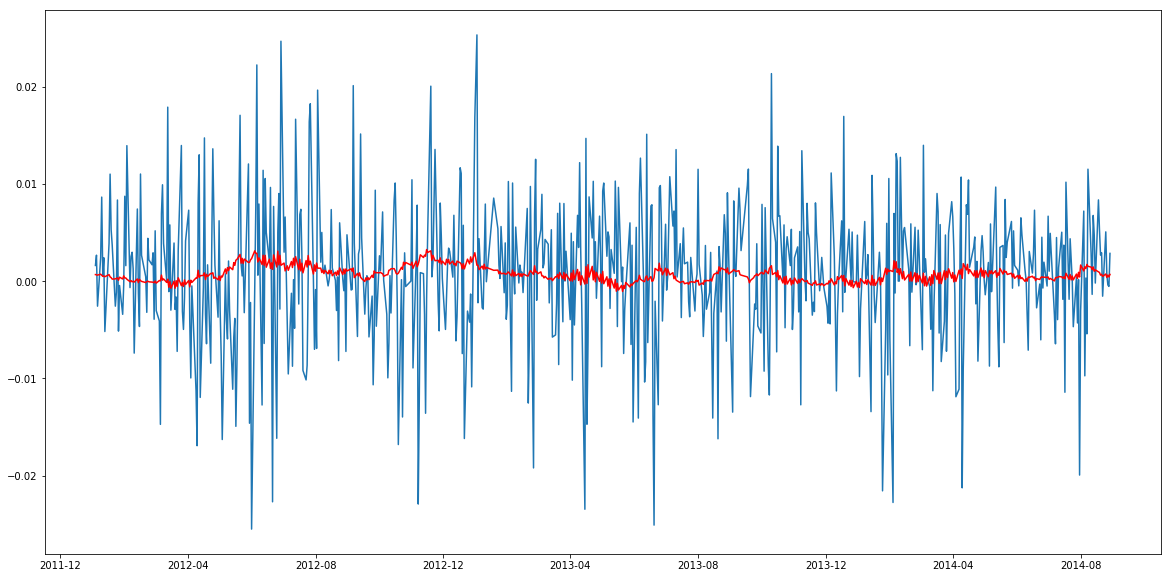

In [150]:

model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.show()

In [151]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

date
2012-01-04    0.000667
2012-01-05    0.000644
2012-01-06    0.000609
2012-01-09    0.000708
2012-01-10    0.000597
dtype: float64


In [153]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

date
2012-01-04    0.000667
2012-01-05    0.001311
2012-01-06    0.001920
2012-01-09    0.002629
2012-01-10    0.003226
dtype: float64


In [154]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

date
2012-01-03         NaN
2012-01-04    0.000667
2012-01-05    0.001311
2012-01-06    0.001920
2012-01-09    0.002629
dtype: float64

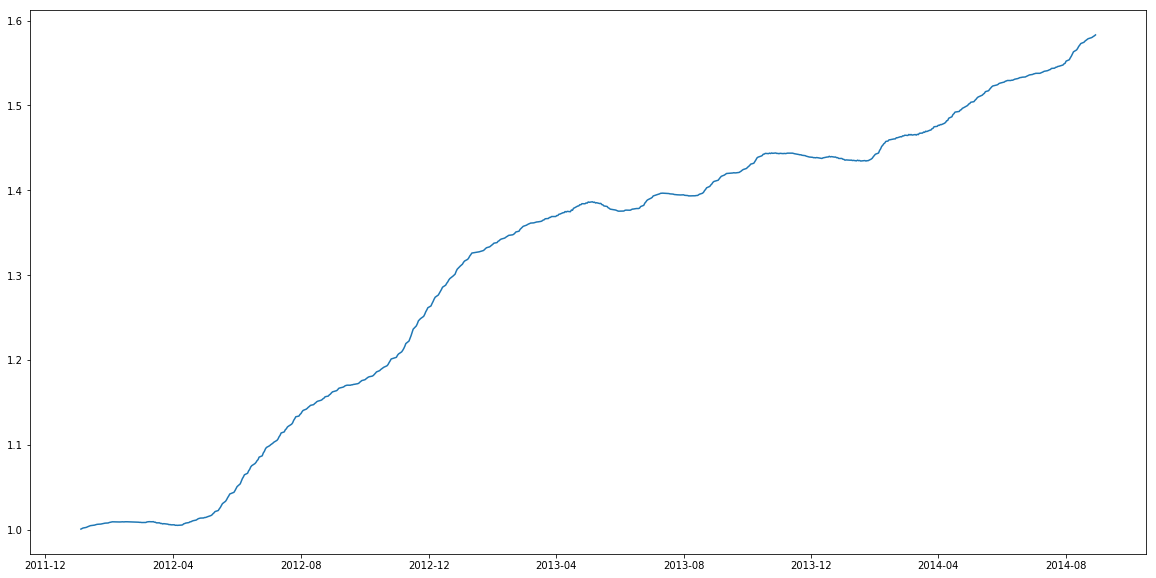

In [167]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(predictions_ARIMA)
plt.show()